<a href="https://colab.research.google.com/github/anhemxanh123/final/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Import essential and visualization libraries / packages**

In [90]:
import os
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt



**2. Read in the csv files as a dataframe**

In [64]:
path = 'Sac.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


**3. How many types can sell?**

In [73]:
print("It have ",df["type"].nunique(), "type" )
print(set(df['type']))

It have  4 type
{'Condo', 'Residential', 'Unkown', 'Multi-Family'}


**4. Which cities have houses for sale and which cities have the most houses for sale?**

In [16]:
df['city'].value_counts()


SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
POLLOCK PINES        3
RANCHO MURIETA       3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
GREENWOOD            1
WALNUT GROVE         1
SLOUGHHOUSE          1
GARDEN VALLEY        1
SHINGLE SPRINGS      1
MEADOW VISTA         1
FORESTHILL           1
COOL                 1
MATHER               1
PENRYN               1
DIAMOND SPRINGS      1
Name: city, dtype: int64

In [12]:

print("The city have the most houses for sale : ",df['city'].value_counts().idxmax() )

The city have the most houses for sale :  SACRAMENTO


**5. Minimum, maximum and average value of houses**

In [37]:
print("Mean: ",df["price"].mean())
print("Maximum: ",df["price"].max())
print("Minimum: ",df["price"].min()) 


Mean:  234144.26395939087
Maximum:  884790
Minimum:  1551


In [39]:
df.nsmallest(1, 'price')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
865,3720 VISTA DE MADERA,LINCOLN,95648,CA,3,3,0,Residential,Fri May 16 00:00:00 EDT 2008,1551,38.851645,-121.231742


In [40]:
df.nlargest(1, 'price')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400,Residential,Fri May 16 00:00:00 EDT 2008,884790,38.415298,-121.194858


**6. The number of odd and even zip codes**

In [62]:
def odd_check(x):
    return True if x % 2 == 0 else False

odd = 0
even = 0
lst = df['zip'].values.tolist()
for i in lst:
  if odd_even(i): 
    odd += 1
  else: 
    even += 1
print(f'There are {odd} odd and {even} even zip code ')

There are 590 odd and 395 even zip code 


**7. Transaction value per day**

In [98]:
df['Day'] = df['sale_date'].str.slice(0,3)
sales = df.groupby('Day').sum()['price']
sales

Day
Fri    70307130
Mon    55304800
Thu    19760618
Tue    46515072
Wed    38744480
Name: price, dtype: int64

In [142]:
df['sq__ft'].value_counts()


0       171
1120      8
795       6
1410      5
1039      5
       ... 
988       1
1656      1
876       1
1659      1
1235      1
Name: sq__ft, Length: 603, dtype: int64

**8. Statistics on the number of houses with low, normal and expensive prices**

In [126]:
cheap = 0
normal = 0
expensive = 0
for i in range(len(df)):
  if df.loc[i,'price'] < 5000 : cheap += 1
  elif 5000 < df.loc[i,'price'] < 10000 : normal += 1
  elif df.loc[i,'price'] > 10000 : expensive += 1
print(f"There are {cheap} affordable homes,  {normal} mid-priced homes, and, {expensive}  expensive homes")

There are 51 affordable homes,  0 mid-priced homes, and, 934  expensive homes


**9. The graph shows the value obtained by day**

['Fri', 'Mon', 'Thu', 'Tue', 'Wed']


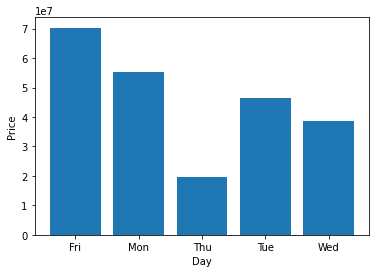

In [105]:
days = []
for Day, sale in sales.items():
  days.append(Day)
print(days)

plt.bar(x = days, height = sales )
plt.xticks(days)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

**10. The graph shows the percentage of homes sold**

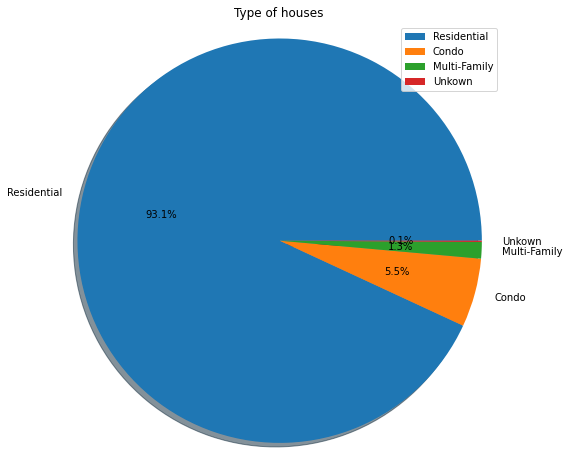

In [138]:
types = df['type'].unique()
plt.pie(df['type'].value_counts(),shadow = True,labels=types,autopct='%1.1f%%')
plt.title('Type of houses')
plt.axis('equal')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

